In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [4]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
results_dir = rdrive + 'processed_results/'
mll_gam = rdrive + 'mll/gam_spec/'
mll_nuc = rdrive + 'mll/nuc_conc/'
learn_gam = rdrive + 'scikit/gam_spec/'
learn_nuc = rdrive + 'scikit/nuc_conc/'

In [5]:
# uncertainty for both MLL and Scikit are now sqrt(counts), but implemented differently (std dev versus rand err method in scikit)
# nuc and act trainsets use flat 5% unc/rand err
# 6.7% of the train set is reserved as test set (randomly in each case, but also implemented differently)

In [6]:
dets = ['nuc29', 'act32', 'act4/9', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
pred = ['reactor', 'burnup', 'enrichment', 'cooling']
predmll = ['ReactorType', 'Burnup', 'Enrichment', 'CoolingTime']
csv_end = '_mimic_mll.csv'

## Looking at Median Abs Error

In [14]:
df = pd.read_pickle(results_dir + 'burnup_auto_abserr_mll_scikit_compare.pkl')

In [69]:
colors

{'DBrwn': '#452704',
 'MBrwn': '#874d08',
 'LBrwn': '#d4790d',
 'DTeal': '#0b3f40',
 'MTeal': '#158285',
 'LTeal': '#0bcfd4',
 'DPurp': '#450a4f',
 'MPurp': '#762a83',
 'LPurp': '#e283f2'}

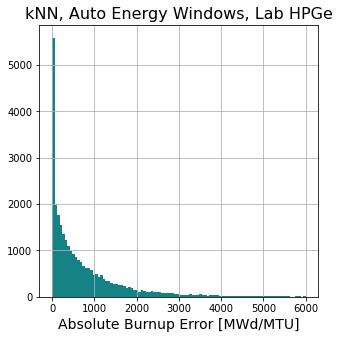

In [104]:
#fig, ax = plt.subplots(111)
df.hist(column=('knn', 'd1_hpge'), bins=100, color=colors['MTeal'], range=(0,6000), figsize=(5,5))
plt.xlabel('Absolute Burnup Error [MWd/MTU]', fontsize=14)
plt.title('kNN, Auto Energy Windows, Lab HPGe', fontsize=16)
#df.hist(column=('dtree', 'd1_hpge'), bins=100, color=colors['MTeal'], range=(0,6000), figsize=(5,5))
#df.hist(column=('mll', 'd1_hpge'), bins=100, color=colors['MTeal'], range=(0,6000), figsize=(5,5))
plt.savefig('./plots/abs_err_hist.png', bbox_inches='tight', transparent=True)

In [27]:
df.loc[:, ('knn', 'nuc29')].describe()['75%']

249.60700199887788

# Box Plots

In [7]:
algcol = ['knn', 'dtree', 'mll']

In [8]:
x = ['Nuc29', 'Act32', 'Act4/9', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
def box_plot(pred_param, title):
    plt.clf()
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
    axs[1].set_xlabel('Detector Type', fontsize=20, labelpad=15)
    if pred_param == 'reactor':
        axs[0].set_ylabel('B. Accuracy Score', fontsize=20, labelpad=15)
    else:
        err = 'Mean Abs Error'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% U235]'
        else:
            yaxlbl = err + ' [days]'
        axs[0].set_ylabel(yaxlbl, fontsize=20, labelpad=15)
    fig.suptitle(title, fontsize=22)
    fig.subplots_adjust(top=.85)
    for i, ax in enumerate(axs):
        #sns.boxplot(df.loc[:, algcol[i]], orient='v', ax=ax)
        sns.catplot(data=df.loc[:, algcol[i]], ax=ax, kind='box')
        ax.set_title(algcol[i], fontsize=20)
        ax.set_xticklabels(x)
        ax.tick_params(labelsize=12, labelrotation=45)
        ax.set_ylim(0,3000)
    plt.show()
    return

# Error Bar Plots

<Figure size 432x288 with 0 Axes>

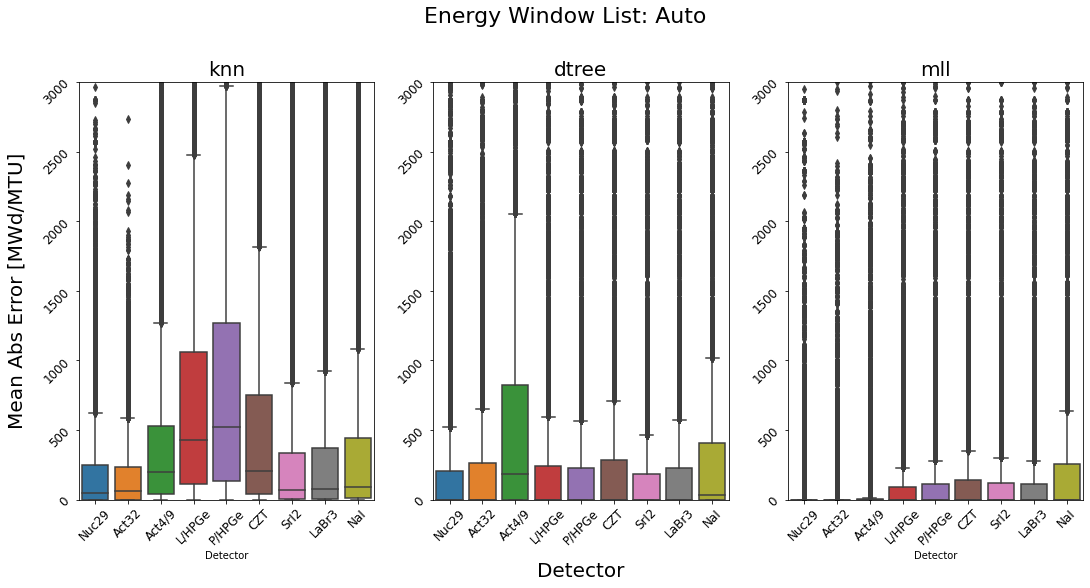

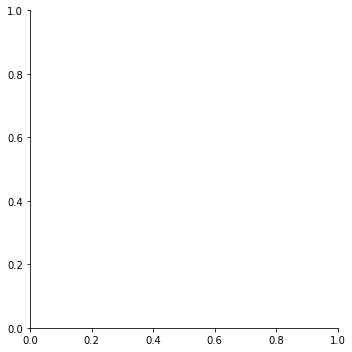

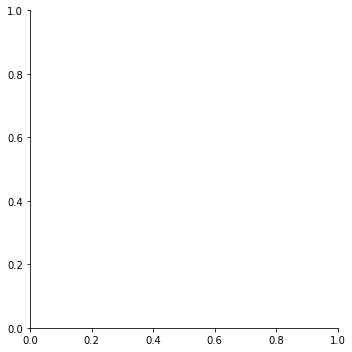

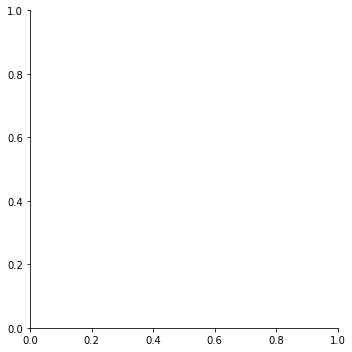

In [86]:
df = pd.read_pickle(results_dir + 'burnup_auto_abserr_mll_scikit_compare.pkl')
box_plot('burnup', 'Energy Window List: Auto')

<Figure size 432x288 with 0 Axes>

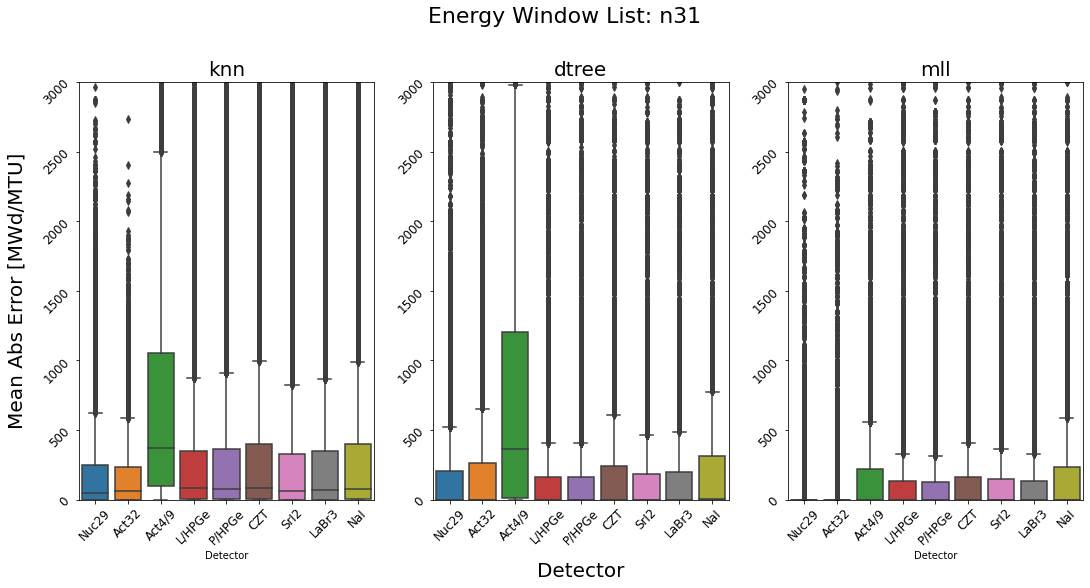

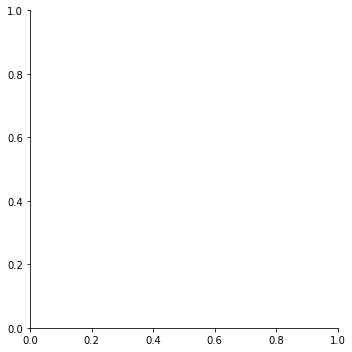

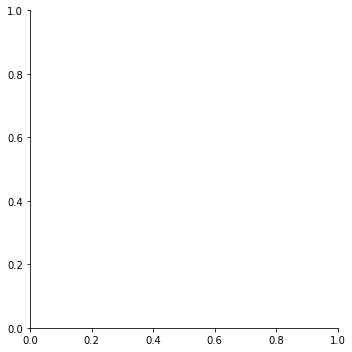

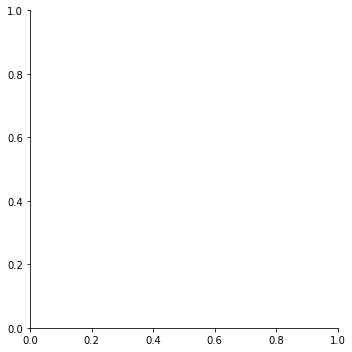

In [87]:
df = pd.read_pickle(results_dir + 'burnup_n31_abserr_mll_scikit_compare.pkl')
box_plot('burnup', 'Energy Window List: n31')